/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


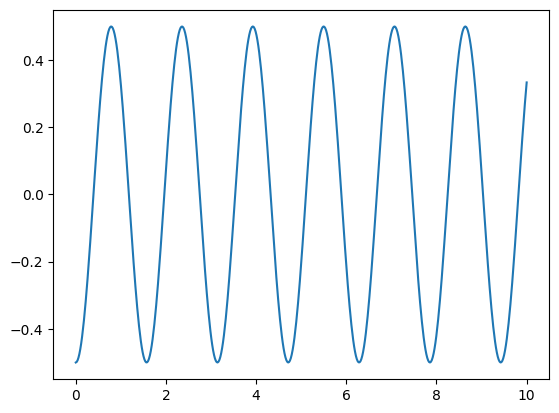

In [6]:
from scipy.linalg import expm
from qiskit.quantum_info import Pauli
import numpy as np
import qiskit as qk
# Define Pauli matrices
XX = Pauli ('XX').to_matrix ()
YY = Pauli ('YY').to_matrix ()
ZZ = Pauli ('ZZ').to_matrix ()
ZI = Pauli ('ZI').to_matrix ()
IZ = Pauli ('IZ').to_matrix ()

# Set coefficients
J = 1.0
D = 0.0
h = 0.0

# Define H
H = J *( XX + YY ) + D * ZZ + h *( ZI - IZ )

# Define U
def uni(t):
  U = expm(-1j*t*H)
  return U

def init_state():
  up = np.array([[1],[0]])
  dn = np.array([[0],[1]])
  x = 1/np.sqrt(2)*(up+dn)

  colmat = np.kron(x, up)
  return colmat

time = np.linspace (0,10,500)
magnetization = []

for t in time:
  U = uni(t)
  psi_t = U @ init_state()
  psi_t_dag = np.conj(psi_t.T)

  mag = 0.5*((psi_t_dag @ ZI @ psi_t)[0][0] - (psi_t_dag @ IZ @ psi_t)[0][0])
  magnetization.append(mag)

  #magnetization.append((psi_t_dag @ ZI @ psi_t)[0][0])



import matplotlib.pyplot as plt
plt.plot(time,magnetization)


In [25]:
#Define simulation parameters
N = 2 #number of spins/qubits
#XY model Simulation parameters
Jx = 1.0
Jy = 1.0
delta_t = 0.25 #time-step size
num_steps = 40 #number of time-steps, we start with a small number for speed of demonstration
shots = 8192 #number of shots for circuit execution

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


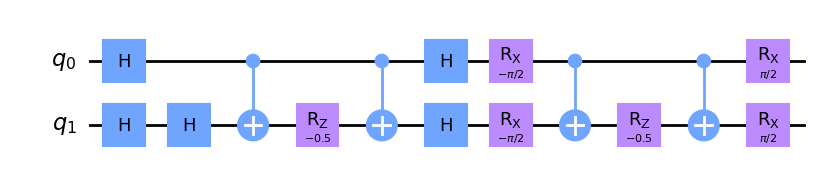

In [18]:
#create the circuit to execute the time-evolution operator for a given time-step
def evolution_circuit_XY(num_time_steps, Jx, Jy, delta_t, N):
    hbar = 1.0# 0.658212    # eV*fs
    time_evol_circuit = qk.QuantumCircuit(N)
    #define rotation angles for gates in circuit
    psiX = -2.0*Jx*delta_t/hbar
    psiY = -2.0*Jy*delta_t/hbar

    time_evol_circuit.h(1)

    for step in range(num_time_steps):
        #implement XX operator
        for q in range(0,N-1):
            time_evol_circuit.h(q)
            time_evol_circuit.h(q+1)
            time_evol_circuit.cx(q,q+1)
            time_evol_circuit.rz(psiX,q+1)
            time_evol_circuit.cx(q,q+1)
            time_evol_circuit.h(q)
            time_evol_circuit.h(q+1)
        #implement YY operator
        for q in range(0,N-1):
            time_evol_circuit.rx(-np.pi/2, q)
            time_evol_circuit.rx(-np.pi/2,q+1)
            time_evol_circuit.cx(q,q+1)
            time_evol_circuit.rz(psiY,q+1)
            time_evol_circuit.cx(q,q+1)
            time_evol_circuit.rx(np.pi/2, q)
            time_evol_circuit.rx(np.pi/2,q+1)
    return time_evol_circuit

#draw circuit for time-step 1
circ = evolution_circuit_XY(1,Jx,Jy,delta_t,N)
circ.draw(output='mpl', filename = 'evolution_circuit_XY.eps')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


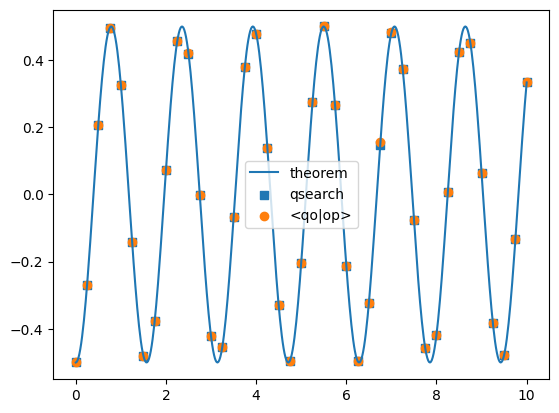

In [43]:
#Create set of final circuits for quantum quench simulations
from qiskit.quantum_info import Statevector
time_qs = np.linspace(0,10,num_steps + 1)
magnetization_qsearch = []
cnot = []
for i in range(0, num_steps + 1):
    #XY model
    qc = evolution_circuit_XY(i,Jx,Jy,delta_t,N)
    #print(i)
    #print(qc)
    cnot.append(4*i)

    statevector = Statevector.from_instruction(qc)
    psi_t = np.array(statevector.data).reshape(-1, 1)
    psi_t_dag = np.conj(psi_t.T)

    mag = (psi_t_dag @ ZI @ psi_t)[0][0] - (psi_t_dag @ IZ @ psi_t)[0][0]
    magnetization_qsearch.append(0.5*mag)

    #magnetization_qsearch.append((psi_t_dag @ ZI @ psi_t)[0][0])


import matplotlib.pyplot as plt

our = np.array([-0.49999829, -0.27014825,  0.20812867,  0.49624545,  0.32682077,
       -0.14182766, -0.48009409, -0.3769491 ,  0.07275963,  0.45556664,
        0.42122345, -0.00219601, -0.42192381, -0.45372381, -0.06836642,
        0.37984729,  0.47897476,  0.1375825 , -0.33016411, -0.49434444,
       -0.20404522,  0.27386198,  0.49997789,  0.26639726, -0.21208071,
       -0.49560399, -0.32346135,  0.1575548 ,  0.4835768 ,  0.37402352,
       -0.07712619, -0.45737952, -0.41710958,  0.00663858,  0.42427804,
        0.45203623,  0.06399508, -0.3827099 , -0.47753528, -0.13331808,
        0.33345512])

plt.plot(time,magnetization, label = 'theorem')
plt.scatter(time_qs,magnetization_qsearch, marker = 's',  label = 'qsearch')
plt.scatter(time_qs,our, marker = 'o', label = '<qo|op>')
plt.legend()
plt.savefig('magnetization.eps', dpi = 1000)

<Figure size 640x480 with 0 Axes>

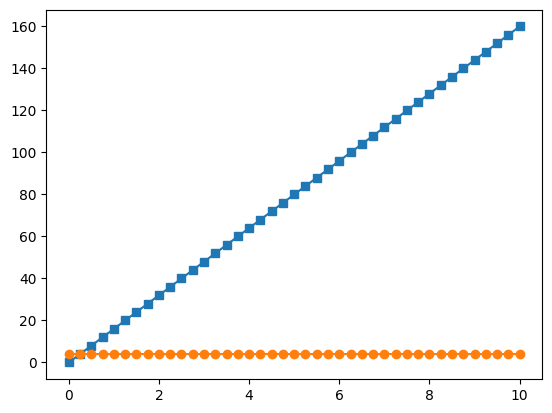

In [42]:
#plot cnot

plt.plot(time_qs,cnot, marker = 's')
plt.plot(time_qs, [4] * len(time_qs), marker = 'o')
plt.savefig('cnot.eps', dpi = 1000)

In [ ]:
#make constant-depth circuits
from qiskit.providers.fake_provider import FakeQasmSimulator
backend = FakeQasmSimulator()
unitary_sim = Aer.get_backend('unitary_simulator')
for t in range(num_steps+1):
    #get target unitary for the given timestep
    job = execute(circuits[t], unitary_sim)
    result = job.result()
    target_unitary = result.get_unitary(circuits[t], decimals=12)
    #get constant-depth circuit structure for N qubits
    circ_struct = make_MGC(N)
    #optimize parameters of circuit
    # use the multistart solver, may want to increase the number of starts for more qubits, but that will also be slower
    solv = multistart_solvers.MultiStart_Solver(24)
    # set up some options
    opts = qsearch.Options()
    opts.target = target_unitary
    #opts.gateset = gateset
    opts.set_defaults(**standard_defaults)
    opts.set_smart_defaults(**standard_smart_defaults)
    # optimize the circuit structure (circ_struct) for target U
    # returns the calculated matrix and the vector of parameters
    dist = 1
    # run a few times to make sure we find the correct solution
    for _ in range(5):
        mat, vec = solv.solve_for_unitary(circ_struct, opts)
        dist_new = utils.matrix_distance_squared(mat, target_unitary)
        print(dist_new)
        if dist_new < dist:
            dist = dist_new
        if dist < 1e-10:
            break

    print(f'For timestep {t} got distance {dist}')
    #get final circuit

    result_dict = {}
    result_dict["structure"] = circ_struct
    result_dict["parameters"] = vec

    opts.assemblydict=assemblydict_ibmopenqasm
    out = opts.assembler.assemble(result_dict, opts)
    #write results to file
    with open(f'{N}q_XY_timestep{t}.qasm', "w") as wfile:
        wfile.write(out)

ImportError: cannot import name 'FakeQasmSimulator' from 'qiskit.providers.fake_provider' (/usr/local/lib/python3.10/dist-packages/qiskit/providers/fake_provider/__init__.py)

In [ ]:
#prepare constant depth circuits to run on quantum backends
q_regs = qk.QuantumRegister(N, 'q')
c_regs = qk.ClassicalRegister(N, 'c')
cd_circuits = []
for t in range(num_steps+1):
    total_circ = qk.QuantumCircuit(q_regs, c_regs)
    #initialize to the ground state of ZZ, i.e., the Neel state
    for q in range(N):
        if(q%2 != 0):
            total_circ.x(q_regs[q])
    total_circ.barrier()
    circ = qk.QuantumCircuit.from_qasm_file(f'{N}q_XY_timestep{t}.qasm')
    total_circ.compose(circ, inplace=True)
    total_circ.measure(q_regs, c_regs)
    cd_circuits.append(total_circ)

FileNotFoundError: /content/3q_XY_timestep0.qasm

In [ ]:
#compare lengths of IBM vs constant-depth circuits for time-step t
t = 9
print(len(circuits[t]))
print(len(cd_circuits[t]))

252


IndexError: list index out of range